<a href="https://colab.research.google.com/github/Prathisha0205/DL-PROJECT-CODES/blob/main/Project_Title_Customer_Segmentation_%26_Purchase_Prediction_%F0%9F%9B%8D%EF%B8%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset preview:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Purchase
0,1,0,49,27,85,0
1,2,1,56,46,53,0
2,3,0,66,46,23,0
3,4,0,69,40,16,0
4,5,0,49,49,57,0


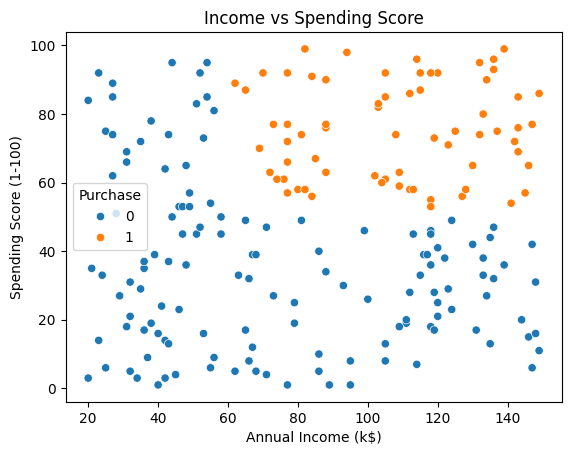

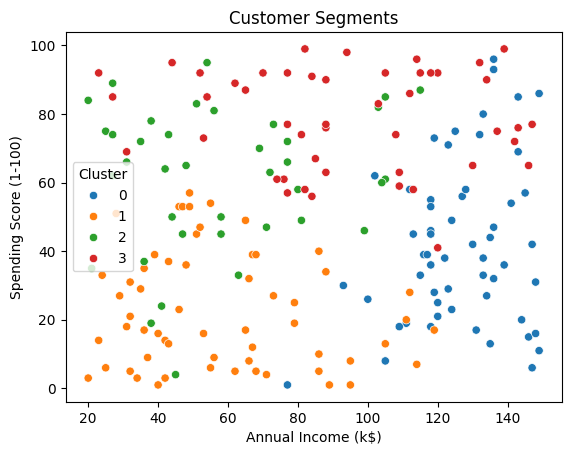

📋 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.75      0.86      0.80        14

    accuracy                           0.85        40
   macro avg       0.83      0.85      0.84        40
weighted avg       0.86      0.85      0.85        40

🌲 Random Forest Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.93      0.96        14

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



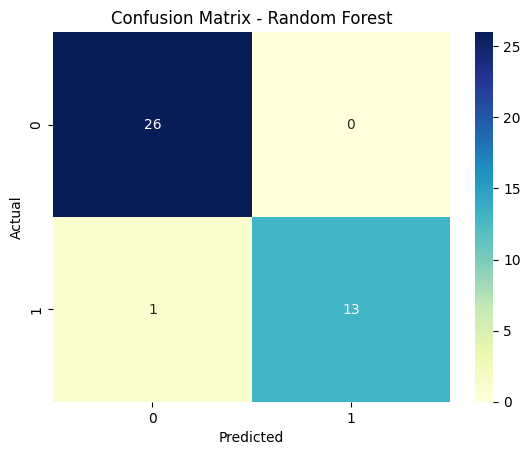

In [1]:
# 📚 Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🎯 Simulated Dataset: Create Mall Customers
np.random.seed(42)
n = 200
data = pd.DataFrame({
    'CustomerID': np.arange(1, n + 1),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Age': np.random.randint(18, 70, n),
    'Annual Income (k$)': np.random.randint(20, 150, n),
    'Spending Score (1-100)': np.random.randint(1, 100, n)
})

# 🔧 Encode gender
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# 💡 Simulate target: Purchase (1/0)
data['Purchase'] = ((data['Spending Score (1-100)'] > 50) & (data['Annual Income (k$)'] > 60)).astype(int)

print("✅ Dataset preview:")
display(data.head())

# 📊 EDA
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Purchase')
plt.title("Income vs Spending Score")
plt.show()

# 📦 Standardize for clustering
X_cluster = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# 🔀 KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# 📊 Cluster visualization
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title("Customer Segments")
plt.show()

# 🎯 Predict Purchase
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]
y = data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("📋 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

# 🌳 Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🌲 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# 🔍 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
